# Genetic Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ga import GA
from functions import sphere, rastringin, ackley

## Analisar o impacto dos parâmetros do GA na solução das funções de teste.
* Variar o tamanho da população no intervalo [30 - 100] em passos de 10. 
* Mostrar resultado em um gráfico com tamanho da população vs. melhor fitness encontrado;
* Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções (exemplo).

### Sphere

In [2]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    ga = GA(sphere, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution = ga.run()
        results.append(execution)
        
    sphere_particle_number.append(n)
    sphere_results.append(results)

### Rastringin

In [3]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    ga = GA(rastringin, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution = ga.run()
        results.append(execution)
    
    rastringin_particle_number.append(n)
    rastringin_results.append(results)

### Ackley

In [4]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    ga = GA(ackley, bounds, pop_size=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution = ga.run()
        results.append(execution)
    
    ackley_particle_number.append(n)
    ackley_results.append(results)

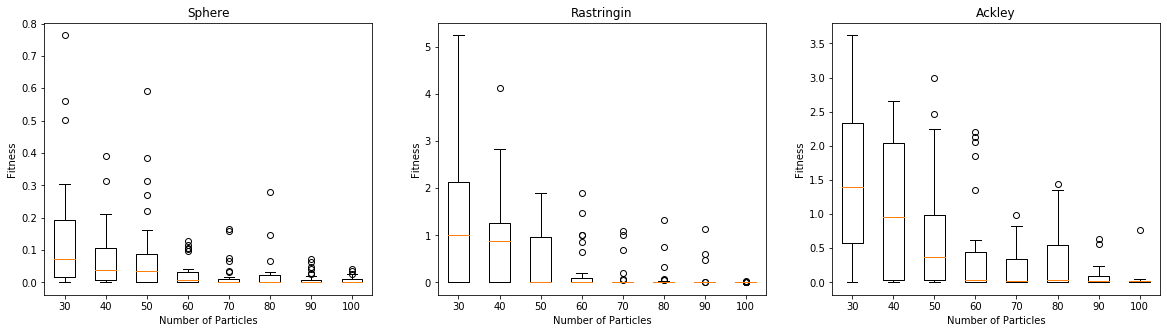

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), sphere_particle_number)
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), rastringin_particle_number)
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), ackley_particle_number)
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.show()

# Variar taxa de cruzamento no intervalo [50% - 100%] em passos de 10.
* Mostrar resultado em um gráfico com taxa de cruzamento vs. melhor fitness encontrado;
* Cada “ponto” do gráfico deve ser um box-plot dos 30 valores das execuções.


### Sphere

In [10]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(sphere, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution = ga.run()
        results.append(execution)
        
    sphere_cross_probability.append(n)
    sphere_results.append(results)

### Rastringin

In [11]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(rastringin, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution = ga.run()
        results.append(execution)
    
    rastringin_cross_probability.append(n)
    rastringin_results.append(results)

### Ackley

In [12]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_cross_probability = []

# varying the number of particles
for n in np.arange(0.5, 1.01, 0.1):
    ga = GA(ackley, bounds, cx_prob=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution = ga.run()
        results.append(execution)
    
    ackley_cross_probability.append(n)
    ackley_results.append(results)

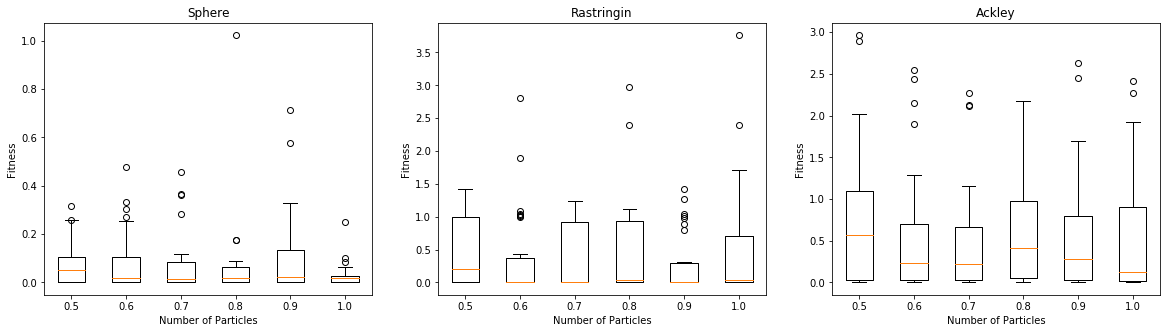

In [13]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), np.around(sphere_cross_probability,1))
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), np.around(rastringin_cross_probability,1))
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), np.around(ackley_cross_probability,1))
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.show()

# Variar tipo de cruzamento entre as opções: cruzamento 1 ponto, cruzamento 2 pontos.
* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
* Terão duas séries neste gráfico, uma para cada tipo de cruzamento
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro (exemplo).


# Variar tipo de seleção de sobrevivência entre: elitismo, roleta e aleatória
* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
* Terão três séries neste gráfico, uma para cada tipo de seleção
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro.
